# pandas入門

- パッケージのimport
- csvの読み込み
- データのクレンジング(head,tail)
- DadaFrameとSeries
- 列の選択
- 行の選択
- セルの選択
- 行のフィルター
- 列の加工
- 列の連結
- plot 平均気温でもplotしてみるかな。。。

In [2]:
# パッケージのimport
import pandas as pd

## csvの読み込み

In [ ]:
df = pd.read_csv('./data/気象庁のデータ.csv')

In [2]:
df = pd.read_csv('./data/気象庁のデータ.csv', encoding='Shift-jis')

In [8]:
df.head()

ダウンロードした時刻：2017/11/20 22:35:50
NaN     千葉      千葉      千葉      千葉         千葉     千葉                                    千葉
        平均気温(℃) 最高気温(℃) 最低気温(℃) 降水量の合計(mm) 日照率(％) 平均風速(m/s)                       日照時間(時間)
        NaN     NaN     NaN     NaN        NaN    NaN                                  NaN
2012年1月 4.4     11.5    -1.9    47.0       57     3.3                                176.4
2012年2月 5.2     17.4    -1.6    103.5      46     3.3                                143.5

## データのクレンジング(head,tail)

In [9]:
df.tail()

,,,,,,,ダウンロードした時刻：2017/11/20 22:35:50
2016年8月,27.3,37.7,21.2,250.5,40,4.0,168.8
2016年9月,24.9,32.3,18.3,286.0,24,3.3,90.3
2016年10月,19.4,32.8,10.5,104.0,38,3.0,132.2
2016年11月,12.1,21.3,0.8,147.0,40,2.9,123.1
2016年12月,9.9,21.7,1.4,57.0,61,3.4,184.6


### herd側にいらない行が入っている
- 1: いらない
- 2: いらない
- 3: 列のラベル
- 4: いらない
- 5: ここからデータ

#### とりあえず、参考サイトを確認
https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html#pandas.read_csv

http://pythondatascience.plavox.info/pandas/%E8%A1%8C%E3%83%BB%E5%88%97%E3%82%92%E5%89%8A%E9%99%A4

In [48]:
# headerオプションが使えそう
df = pd.read_csv('./data/気象庁のデータ.csv', encoding='Shift-jis',header=2)
df.head()

,Unnamed: 0,平均気温(℃),最高気温(℃),最低気温(℃),降水量の合計(mm),日照率(％),平均風速(m/s),日照時間(時間)
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2012年1月,4.4,11.5,-1.9,47.0,57.0,3.3,176.4
2,2012年2月,5.2,17.4,-1.6,103.5,46.0,3.3,143.5
3,2012年3月,8.7,20.4,2.0,134.0,39.0,3.8,143.0
4,2012年4月,14.0,24.3,4.5,111.0,42.0,4.2,165.8


まだ0行目にNaNが入っているのでこの行を削除する

In [49]:
df = df.dropna()
df = df.reset_index(drop=True)

In [50]:
df.head()

,Unnamed: 0,平均気温(℃),最高気温(℃),最低気温(℃),降水量の合計(mm),日照率(％),平均風速(m/s),日照時間(時間)
0,2012年1月,4.4,11.5,-1.9,47.0,57.0,3.3,176.4
1,2012年2月,5.2,17.4,-1.6,103.5,46.0,3.3,143.5
2,2012年3月,8.7,20.4,2.0,134.0,39.0,3.8,143.0
3,2012年4月,14.0,24.3,4.5,111.0,42.0,4.2,165.8
4,2012年5月,19.2,27.4,10.5,169.0,45.0,4.0,195.1


In [73]:
# listにするとcolumn_nameｓの一覧が取れる
list(df)

['Unnamed: 0',
 '平均気温(℃)',
 '最高気温(℃)',
 '最低気温(℃)',
 '降水量の合計(mm)',
 '日照率(％)',
 '平均風速(m/s)',
 '日照時間(時間)']

##  DadaFrameとSeries

- DataFrameが2次元でつまり表のデータ

In [52]:
# df.shapeでデータの形がわかる
# 8列 x 60行のデータなので
df.shape

(60, 8)

- Seriesが1次元で列のデータ
- DataFrameから列を取り出すとSeriesになっている

In [51]:
series = df['平均気温(℃)']
series.__class__

pandas.core.series.Series

In [56]:
# series.shapeでもデータの形がわかる
# これは60行のデータなので
series.shape

(60,)

- 列の選択
- 行の選択
- セルの選択

http://pythondatascience.plavox.info/pandas/%E8%A1%8C%E3%83%BB%E5%88%97%E3%81%AE%E6%8A%BD%E5%87%BA

### 列の選択

In [74]:
# 列の選択
df['最高気温(℃)'].head()

0    11.5
1    17.4
2    20.4
3    24.3
4    27.4
Name: 最高気温(℃), dtype: float64

In [55]:
# 複数の列を取ることも
df[['最高気温(℃)','最高気温(℃)']].head()


,最高気温(℃),最高気温(℃)
0,11.5,11.5
1,17.4,17.4
2,20.4,20.4
3,24.3,24.3
4,27.4,27.4


In [57]:
# df.locで列を指定
df.loc[:, ['最高気温(℃)','最高気温(℃)']].head()

,最高気温(℃),最高気温(℃)
0,11.5,11.5
1,17.4,17.4
2,20.4,20.4
3,24.3,24.3
4,27.4,27.4


In [62]:
# df.ilocで列の番号を
df.iloc[:, [0,1,3]].head()

,Unnamed: 0,平均気温(℃),最低気温(℃)
0,2012年1月,4.4,-1.9
1,2012年2月,5.2,-1.6
2,2012年3月,8.7,2.0
3,2012年4月,14.0,4.5
4,2012年5月,19.2,10.5


### 行の選択

In [53]:
# 行の選択
df[:3]# 最初から3行目まで

,Unnamed: 0,平均気温(℃),最高気温(℃),最低気温(℃),降水量の合計(mm),日照率(％),平均風速(m/s),日照時間(時間)
0,2012年1月,4.4,11.5,-1.9,47.0,57.0,3.3,176.4
1,2012年2月,5.2,17.4,-1.6,103.5,46.0,3.3,143.5
2,2012年3月,8.7,20.4,2.0,134.0,39.0,3.8,143.0


In [54]:
df.loc[:3]

,Unnamed: 0,平均気温(℃),最高気温(℃),最低気温(℃),降水量の合計(mm),日照率(％),平均風速(m/s),日照時間(時間)
0,2012年1月,4.4,11.5,-1.9,47.0,57.0,3.3,176.4
1,2012年2月,5.2,17.4,-1.6,103.5,46.0,3.3,143.5
2,2012年3月,8.7,20.4,2.0,134.0,39.0,3.8,143.0
3,2012年4月,14.0,24.3,4.5,111.0,42.0,4.2,165.8


In [78]:
df[2:5] # 2行目よりあとから5行目まで

,Unnamed: 0,平均気温(℃),最高気温(℃),最低気温(℃),降水量の合計(mm),日照率(％),平均風速(m/s),日照時間(時間)
2,2012年3月,8.7,20.4,2.0,134.0,39.0,3.8,143.0
3,2012年4月,14.0,24.3,4.5,111.0,42.0,4.2,165.8
4,2012年5月,19.2,27.4,10.5,169.0,45.0,4.0,195.1


In [79]:
df[58:]# 58行目よりあとから最後まで

,Unnamed: 0,平均気温(℃),最高気温(℃),最低気温(℃),降水量の合計(mm),日照率(％),平均風速(m/s),日照時間(時間)
58,2016年11月,12.1,21.3,0.8,147.0,40.0,2.9,123.1
59,2016年12月,9.9,21.7,1.4,57.0,61.0,3.4,184.6


In [64]:
# ilocで行の番号を指定して表示
df.iloc[[0,1,3]]

,Unnamed: 0,平均気温(℃),最高気温(℃),最低気温(℃),降水量の合計(mm),日照率(％),平均風速(m/s),日照時間(時間)
0,2012年1月,4.4,11.5,-1.9,47.0,57.0,3.3,176.4
1,2012年2月,5.2,17.4,-1.6,103.5,46.0,3.3,143.5
3,2012年4月,14.0,24.3,4.5,111.0,42.0,4.2,165.8


### cellを取得する

In [66]:
# Series→添字で取得
df['平均気温(℃)'][0]
# df['平均気温(℃)']でSeriesを取得
# Seriesからindexをしていして取得しているだけ

4.4000000000000004

In [71]:
# ilocで取得
# ilocではindex番号を指定できる
# 2012年2月の平均気温(℃)なので 5.2
df.iloc[1,1]

5.2000000000000002

In [72]:
df.head()

,Unnamed: 0,平均気温(℃),最高気温(℃),最低気温(℃),降水量の合計(mm),日照率(％),平均風速(m/s),日照時間(時間)
0,2012年1月,4.4,11.5,-1.9,47.0,57.0,3.3,176.4
1,2012年2月,5.2,17.4,-1.6,103.5,46.0,3.3,143.5
2,2012年3月,8.7,20.4,2.0,134.0,39.0,3.8,143.0
3,2012年4月,14.0,24.3,4.5,111.0,42.0,4.2,165.8
4,2012年5月,19.2,27.4,10.5,169.0,45.0,4.0,195.1


In [74]:
# 部分的に切り出すこともできる
# 1:3は1以上3未満
df.iloc[1:3,2]

1    17.4
2    20.4
Name: 最高気温(℃), dtype: float64

In [69]:
# ixで取得
df.ix[1,1]

5.2000000000000002

In [76]:
# ixではラベル名も使える取得
# 2012年3月	の日照率(％)
df.ix[2,'日照率(％)']

39.0

※pandasはオプションがめちゃくちゃ多いのでこれ以外にも取得方法がある。。。

http://ailaby.com/lox_iloc_ix/

- 行のフィルター
- 列の加工
- 列の連結

### 行のフィルター

In [77]:
# 特定の値を持つ行だけ表示したい
# 例えば最低気温が0度以下の寒い月
df[df['最低気温(℃)']<0]

,Unnamed: 0,平均気温(℃),最高気温(℃),最低気温(℃),降水量の合計(mm),日照率(％),平均風速(m/s),日照時間(時間)
0,2012年1月,4.4,11.5,-1.9,47.0,57.0,3.3,176.4
1,2012年2月,5.2,17.4,-1.6,103.5,46.0,3.3,143.5
11,2012年12月,7.1,18.9,-1.1,75.0,58.0,3.3,174.0
12,2013年1月,5.3,13.8,-0.8,77.0,67.0,3.7,207.4
13,2013年2月,5.8,19.2,-0.9,46.5,55.0,3.8,166.1
24,2014年1月,6.2,15.6,-1.0,44.0,63.0,3.3,194.4
25,2014年2月,5.7,20.3,-1.6,148.5,39.0,3.3,118.7
37,2015年2月,6.2,19.9,-0.8,62.0,55.0,3.7,166.5
48,2016年1月,6.7,15.9,-0.6,80.0,63.0,3.1,194.2


In [79]:
# なぜこれができるかというと
is_lowest = df['最低気温(℃)']<0
# これはboolのSeriesを返す
is_lowest

0      True
1      True
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11     True
12     True
13     True
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24     True
25     True
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37     True
38    False
39    False
40    False
41    False
42    False
43    False
44    False
45    False
46    False
47    False
48     True
49    False
50    False
51    False
52    False
53    False
54    False
55    False
56    False
57    False
58    False
59    False
Name: 最低気温(℃), dtype: bool

In [80]:
# このboolのSeriesでDataFrameを絞り込むことができる
df[is_lowest]

,Unnamed: 0,平均気温(℃),最高気温(℃),最低気温(℃),降水量の合計(mm),日照率(％),平均風速(m/s),日照時間(時間)
0,2012年1月,4.4,11.5,-1.9,47.0,57.0,3.3,176.4
1,2012年2月,5.2,17.4,-1.6,103.5,46.0,3.3,143.5
11,2012年12月,7.1,18.9,-1.1,75.0,58.0,3.3,174.0
12,2013年1月,5.3,13.8,-0.8,77.0,67.0,3.7,207.4
13,2013年2月,5.8,19.2,-0.9,46.5,55.0,3.8,166.1
24,2014年1月,6.2,15.6,-1.0,44.0,63.0,3.3,194.4
25,2014年2月,5.7,20.3,-1.6,148.5,39.0,3.3,118.7
37,2015年2月,6.2,19.9,-0.8,62.0,55.0,3.7,166.5
48,2016年1月,6.7,15.9,-0.6,80.0,63.0,3.1,194.2


### 列の加工
df.apply(func)を使って日付の文字列をTimestamp型に加工する

 http://pppurple.hatenablog.com/entry/2016/06/27/022310

In [81]:
# その前に、列名をrename
df = df.rename(columns={'Unnamed: 0': 'date_str'})
df.head()

,date_str,平均気温(℃),最高気温(℃),最低気温(℃),降水量の合計(mm),日照率(％),平均風速(m/s),日照時間(時間)
0,2012年1月,4.4,11.5,-1.9,47.0,57.0,3.3,176.4
1,2012年2月,5.2,17.4,-1.6,103.5,46.0,3.3,143.5
2,2012年3月,8.7,20.4,2.0,134.0,39.0,3.8,143.0
3,2012年4月,14.0,24.3,4.5,111.0,42.0,4.2,165.8
4,2012年5月,19.2,27.4,10.5,169.0,45.0,4.0,195.1


#### strからdatetime型への変換

In [91]:
# pandasでは文字列をdatetimeに変換する関数
# https://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html
data_str = '2017年1月'
pd.to_datetime(data_str , format='%Y年%m月', errors='ignore')

Timestamp('2017-01-01 00:00:00')

### df.apply関数でdataframeを一括処理した結果を得る
- `df.apply(func)` では関数を引数に取る
- この関数は `func(1行文のSeries)` みたいなものを作って入れる
- あとは `df.apply` の中の処理でこの関数を使って処理したデータを作ってくれる

In [92]:
# df.apply(func)
def to_date(line):
    date_str = line['date_str']
    return pd.to_datetime(date_str, format='%Y年%m月', errors='ignore')

In [93]:
date = df.apply(to_date,axis=1)
date.head()

0   2012-01-01
1   2012-02-01
2   2012-03-01
3   2012-04-01
4   2012-05-01
dtype: datetime64[ns]

In [94]:
date.__class__

pandas.core.series.Series

変換できた

### 先程のpd.to_datetime関数
https://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html

```
arg : integer, float, string, datetime, list, tuple, 1-d array, Series
```
→Seriesが渡せるっぽい

In [95]:
data = pd.to_datetime(df['date_str'], format='%Y年%m月', errors='ignore')
data.head()

0   2012-01-01
1   2012-02-01
2   2012-03-01
3   2012-04-01
4   2012-05-01
Name: date_str, dtype: datetime64[ns]

df.applyとかしなくても変換できた。

In [18]:
data.__class__

pandas.core.series.Series

In [96]:
# この行のラベルって0〜nより日付のほうがよくない?
# indexを付け替える
# ｇ
df.index = date
df.head()

,date_str,平均気温(℃),最高気温(℃),最低気温(℃),降水量の合計(mm),日照率(％),平均風速(m/s),日照時間(時間)
2012-01-01,2012年1月,4.4,11.5,-1.9,47.0,57.0,3.3,176.4
2012-02-01,2012年2月,5.2,17.4,-1.6,103.5,46.0,3.3,143.5
2012-03-01,2012年3月,8.7,20.4,2.0,134.0,39.0,3.8,143.0
2012-04-01,2012年4月,14.0,24.3,4.5,111.0,42.0,4.2,165.8
2012-05-01,2012年5月,19.2,27.4,10.5,169.0,45.0,4.0,195.1


In [42]:
# 2015年で絞込
df.loc['2015-01-01':'2015-12-01']

,date_str,平均気温(℃),最高気温(℃),最低気温(℃),降水量の合計(mm),日照率(％),平均風速(m/s),日照時間(時間)
2015-01-01,2015年1月,6.5,17.2,0.0,91.5,61.0,4.1,190.1
2015-02-01,2015年2月,6.2,19.9,-0.8,62.0,55.0,3.7,166.5
2015-03-01,2015年3月,10.5,21.1,1.4,103.0,51.0,4.1,188.6
2015-04-01,2015年4月,14.5,24.0,1.8,118.5,38.0,4.2,149.3
2015-05-01,2015年5月,21.0,31.6,11.7,72.5,55.0,4.1,237.2
2015-06-01,2015年6月,22.2,29.8,13.6,161.5,34.0,3.4,145.8
2015-07-01,2015年7月,26.3,35.4,19.1,255.0,46.0,4.5,201.5
2015-08-01,2015年8月,26.8,38.5,19.3,105.0,38.0,3.8,159.1
2015-09-01,2015年9月,23.0,30.2,16.7,403.5,33.0,3.5,122.4
2015-10-01,2015年10月,19.0,28.9,10.7,62.0,55.0,3.6,192.1


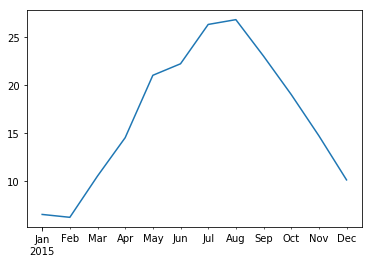

In [45]:
%matplotlib inline
df.loc['2015-01-01':'2015-12-01']['平均気温(℃)'].plot()

In [58]:
# indexをdateに置き換える
df.index=date

In [61]:
df.head
del df['date_str']

,平均気温(℃),最高気温(℃),最低気温(℃),降水量の合計(mm),日照率(％),平均風速(m/s),日照時間(時間)
2012-01-01,4.4,11.5,-1.9,47.0,57.0,3.3,176.4
2012-02-01,5.2,17.4,-1.6,103.5,46.0,3.3,143.5
2012-03-01,8.7,20.4,2.0,134.0,39.0,3.8,143.0
2012-04-01,14.0,24.3,4.5,111.0,42.0,4.2,165.8
2012-05-01,19.2,27.4,10.5,169.0,45.0,4.0,195.1


In [62]:
df.head()

,平均気温(℃),最高気温(℃),最低気温(℃),降水量の合計(mm),日照率(％),平均風速(m/s),日照時間(時間)
2012-01-01,4.4,11.5,-1.9,47.0,57.0,3.3,176.4
2012-02-01,5.2,17.4,-1.6,103.5,46.0,3.3,143.5
2012-03-01,8.7,20.4,2.0,134.0,39.0,3.8,143.0
2012-04-01,14.0,24.3,4.5,111.0,42.0,4.2,165.8
2012-05-01,19.2,27.4,10.5,169.0,45.0,4.0,195.1


In [70]:
%matplotlib inline
df['2012-02-01']

KeyError: '2012-02-01'